# Loading modules

In [19]:

import pandas as pd
import numpy as np

import statsmodels.api as sm
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LinearRegression

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

plt.rcParams['text.usetex'] = True

# Loading the data 

In [43]:

dataPath = "/Users/duuta/inclusiveEnergy-/LabFit/240902-MPX10DP10mmdatacollection-MPX-1.csv"
data = pd.read_csv(dataPath)

print(data.shape)

# rename specific cols 
data.rename(columns={"L PM Rota":"LPM_Rota", 'cd':'dcoef'}, inplace=True)
data0=data.drop(columns={'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'SB lpm.1', 'Accuracy.1', 'Error.1', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36'})
print(data0.columns)
		
# labFit CONSTANTs
A=0.21334
B=0.14933
C=0.033616
D=0.023546

# standard constants
output_lpm=100000  # atm pressure in Pa
Tsb=30.66         # 
KCorrection=273.15          # Kelvin temp correction 
Tn=293.15  # some constant, not sure what exactly it is... some kind of temperature in degrees (20), then Kelvin corrected
A1=0.0005366622509
A2=0.0002010619298
r0=1.184



# epsilon
epsilon=1e-1

(90, 37)
Index(['Static Pressure', 'LPM Rota', 'temp_mcu', 'Static_Pa', 'SP_mV',
       'DP_mV', 'Differential_Pa', 'Flow_lph', 'SB lpm', 'Accuracy', 'Error',
       'ideal flow ', 'dcoef', 'LPM rota normalised', 'P pa (SB), 1',
       'dP SB, 1 ', 'Flow SB lph 1'],
      dtype='object')


In [23]:
print(data0.shape)
data0.duplicated().where(data0.duplicated() == True).count()


(90, 17)


30

In [ ]:
# class to get data, transform and export labfit data

import csv 
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec


from pathlib import Path
from sklearn.linear_models import  LinearRegression
from sklearn.tree import DecisionTreeRegressor


# look class with CSV module python
# use pandas for duplications
# might have to use pandas for the implementations

# (data0.Differential_Pa - min(data0.Differential_Pa))/ (max(data0.Differential_Pa) - min(data0.Differential_Pa)) 

# not sure where I put the decorator
# but can stll implement the different sections of the class object

class DataSource(Enum):
    def __init__(self):
        raspberry_source = 1
        other_soure = 2

class DataRetriever:
    def __init__(self, source= [Enum], is_connected):
        self.source = source
        self.is_connected = is_connected

    def connector(self):
        if not self.is_connected:
            'establish connection'
        return self.is_connected

    def get_data(self):
        if connector():
            'source data and write to csv or EXcel'
        return 0  

class DataManager(self):
    def __init__(self, filename,  usecols=['Static Pressure', 'LPM Rota', 'temp_mcu', 'Static_Pa', 'SP_mV',
       'DP_mV', 'Differential_Pa', 'Flow_lph', 'ideal flow ', 'cd',], **kwargs,):
        self.filename = filename
        self.data = pd.read_csv(self.filename, usecols, **kwargs)

    def get_col(self, col ):
        'Implement one or many cols of data...'
        if not all(item in self.data.columns.values for item in col):
            raise KeyError(f"{col} not in data columns")
        return self.data.loc[:, col] 

    def get_row(self, row):
        'Implement for one or many row...'
        if not all(item in self.data.columns.values for item in row):
            raise KeyError(f"{row} not in data rows")
        return self.data.loc[row,:]
    
    def get_nrows(self):
        """
            returns the number of rows for data 
        """
        return self.data.count()

    def get_ncols(self):
        "returns the number of cols for data"
        return len(self.data.columns)       

    def remove_duplicates(self):
        "return data without duplicates..."
        return self.data.drop_duplicates(inplace=)


class DataTransformer:
    def __init__(self, data_object,  **kwargs):
        self.data_Object=data_object 

    
    def transform_variable(self, scaling_type='min-max', epsilon, axis=1, **kwargs):
        """
        return scaled versions of desired variables [typically scales to (0, 1)]
        """
        for col in self.data_Object:
            col_data = self.data_Object[col]

            match scaling_type:
                case 'min-max' | 'normalization':
                    max_value = col_data.max()
                    min_value = col_data.min()
                    col_transformed = (col_data - min_value)/ (max_value - min_value)
                
                case 'standardized':
                    mean = col_data.mean()
                    std = col_data.std() + epsilon 
                    col_transformed = (col_data - mean)/std
                
                case _:
                    max_value = col_data.max()
                    min_value = col_data.min()
                    col_transformed = (col_data - min_value)/ (max_value - min_value)

            self.data_Object[col] = col_transformed  
        return data_Object 


    def is_data_transformed(self, scaling_type, tolerance):
        """
        Check if the dataset is appropriately scaled.

        Parameters:
        - df: The DataFrame containing the data
        - scaling_type: 'standardized' or 'normalized' or 'min-max' to check the scaling type
        - tolerance: A tolerance value for mean, std, min, max to allow small deviations
    
        Returns:
        - bool, indicating whether the data is transformed 
        """
    
        for column in self.data.columns:
            column_data = self.data[column]
            
            match scaling_type:
                case 'standardized':
                    # Check mean and std for standardized data (mean ≈ 0, std ≈ 1)
                    mean = column_data.mean()
                    std_dev = column_data.std()
                    is_scaled = (abs(mean) < tolerance) and (abs(std_dev - 1) < tolerance)
                
                    # need to handle what happens if is_scaled is false 

                case 'normalized':
                    # Check min and max for normalized data (min ≈ 0, max ≈ 1)
                    min_val = column_data.min()
                    max_val = column_data.max()
                    is_scaled = (abs(min_val) < tolerance) and (abs(max_val - 1) < tolerance)
                
                    # need to handle what happens if is_scaled is false 
            
                case 'min-max':
                    # Check min and max for min-max normalized data (min ≈ 0 , max ≈ 1 )
                    min_val = column_data.min()
                    max_val = column_data.max()
                    is_scaled = (abs(min_val) < tolerance ) and (abs(max_val - 1) < tolerance )
                    # need to handle what happens if is_scaled is false 

                case _:
                    raise ValueError("Invalid scaling_type. Use 'standardized' or 'normalized'.")
    
        return is_scaled


        def convert_to_flow_lph(self, col):
            if not col:
                return self.data['Flow_lph']/60
            else:
                return self.data[col]/60 


        def apply_lpm_rota_normalization(self, output_lpm, Tn, KCorrection):
            data = self.data_Object
            return data.LPM_Rota *(data.Static_Pa + output_lpm)/ output_lpm*(Tn/(data.temp_mcu + KCorrection))



class DataAnalyzer:
    def __init__(self, data_Object):
        self.data_Object = data_Object
    

    def fit_data(self, X, y, **kwargs, random_state=42):
        """"
        return fitDict of multiple fits for data... including:
        polynomial fit, decision trees, regresssion 
        
        model_values: takes an order pair, model_score, model_mse, and predicted model values
         but poly 2D which takes the coeffs, model_mse, and model_predicted 
        """

        # init, fit and predict linear regression  model
        lm_model = LinearRegression(random_state=42)
        
        lm_score = lm_model.score(X, y)
        lm_y  = lm_model.predict(X)
        lm_mse = compute_residuals(y - lm_y)

        lm_values = make_set_of_metrics(lm_score, lm_mse, lm_y)
        
        
        # init, fit and predict decision tree
        dTree_model = DecisionTreeRegressor(random_state=42)
        
        dTree_score = dTree_model.score(X, y)
        dTree_mse = compute_residuals(y - dTree_y)
        dTree_y  = dTree_model.predict(X)

        dTree_values = make_set_of_metrics(dTree_score, dTree_mse, dTree_y)
        
        
        # designX, fit and predict 2 order polynomial 
        X_design = design_X(X)
        
        coef, _, _, _= np.linalg.lstsq(X_design, y)
        poly_y = X_design @ coef
        poly_mse = compute_residuals(y - poly_y)

        poly_values = make_set_of_metrics(coef, poly_mse, poly_y)

        
        # set dict values        
        return { 'y_actual': y , 'lm_model':lm_values, 'dTree_model':dTree_values, 'poly_model':poly_values}) 



class DataVisualizer:
    def __init__(self, fitDict, **kwargs,  ):
        self.fitDict = fitDict

    def apply_model_visualizer(self, color='blue', figsize=(20, 20), all, **kwargs):

            """
            outputs a plot of all model fits for data, with the default all flag. Working on
            additional flags to allow for flexibilty in comparison. 
            """
            fitDict = self.fitDict

            p=plt.rcParams
            p["figure.figsize"] = figsize
            p["font.sans-serif"] = ["Roboto Condensed"]
            p["font.weight"] = "light"
            p["ytick.minor.visible"] = "True"
            p["xtick.minor.visible"] = "True"

            # define data (fix outputs for model_mse)
            y_actual = fitDict['y_actual']
            lm_score, y_lm =  fitDict['lm_model']
            poly_mse, y_poly =fitDict['poly_model'][1] 
            dTree_score, y_dTree = fitDict['dTree_model'][1]
            

            fig0 = plt.figure(constrainted_layout=True)
            nrows, ncols= 1, 3
            w1, w2 = 20, 1
            gspec=gridspec.GridSpec(ncols=ncols, nrows=nrows, figure=fig0, width_ratios=[w1, w2]))

            # 
            ax = plt.subplot(gspec[0, 0], aspect=1)
            ax.set_xlim(0, 1)
            ax.set_xticks(np.linspace(0, 1, 4 + 1))
            ax.set_xlabel("X instances in time")
            ax.set_ylim(0, 1)
            ax.set_yticks(np.linspace(0, 1, 4 + 1))
            ax.set_ylabel("Discharge Coefficient", fontsize=20)
            ax.set_title("Title", family="Roboto", weight=500)
            ax.axline((0.00, 0.00), slope=1.0, linestyle='--', color='red', linewidth=2.0)
            ax.set_title(f"actual model: y-actual vs y_pred ({ lm_score=:.3f}) {lm_mse=:.3f}", fontsize=20)
            I = ax.scatter(y_actual, y_lm, color=color)

            # Decision tree compare
            ax = plt.subplot(gspec[0, 1], aspect=1)
            ax.set_xlabel("X instances in time", fontsize=20)
            ax.set_title(f"DecisionTreeRegressor: y-actual vs y_pred ({dTree_score=:.3f} {dTree_mse=:.3f})", fontsize=20)
            ax.axline((0.0, 0.0), slope=1, linestyle='--', color='red', linewidth=2.0)
            ax.scatter(y_actual, y_dTree, color=color)

            # poly plot 
            ax = plt.subplot(gspec[0, 2], aspect=1)
            ax.set_xlabel("X instances in time", fontsize=20)
            ax.axline((0.0, 0.0), slope=1, linestyle='--', color='red', linewidth=2.0)
            ax.set_title(f"$f(x, y) = a x^2 + b xy + cx+ dy+ ey^2 + f$: y-actual vs y_pred (R_sq={None} {poly_mse=:.3f})", fontsize=20)
            I = ax.scatter(y_actual, y_poly, color=color)
         

/var/folders/f4/q6n418p95nb77wmf4l9zydddrkwtmh/T/ipykernel_38524/1437512461.py:14: UserWarning: registration of accessor <class '__main__.inclusiveEnergyDataObject'> under name 'inclusiveEnergy' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  class inclusiveEnergyDataObject(object):


# Creating monitor... and fallback for solution

In [ ]:
import datetime
from functools import cache

# what functionality do we want 
# we want to know our data stats that's the monitoring asd
# saves stats... 
# need to track new versions with old versions
# compare the stats 
# set the state of the stats to better version
# if stats are comparable within our tolerance threshold continue 
# else set fallback to data of previous best version
# but fallback to data as
def compute_data_stats(data):
    return { "mean": data.mean(), "std": data.std(), "max":data.max(), "min": data.min() }

def check_data_quality(data_stats, pop_stats):

    def unpack_stats(data_stats):
        mu, std, max_, min_ = data_stats["mean"], data_stats["std"], data_stats["max"], data_stats["min"]
        return mu, std, max_, min_
        
    mu, std, max_, min_ = unpack_stats(data_stats)
    pop_mu, pop_std, pop_max, pop_min = unpack_stats(pop_stats)

    is_data_good = (mu - pop_mu0) < tolearance  and (std - pop_std) and (max_ - pop_max)  and (min_ - pop_min)    

    return is_data_good
    

def assert_feature_cols(cols):
    COLS = ['Static_Pa', "Differential_Pa", "cd"]
    assert COLS == cols, "Incorrect feature cols"
    return 0


@cache
def monitoring_data_stats(data, tolearance=0.00001):
    """
        data should be shape (n, 3)
        monitor data distribution and rasie alert 
        monitor the feature vars before normalization []
        cache the last state if distribution is good...
    """
    curr_data=data 
    best_data=None 
    cols = curr_data.columns 
    
    assert_feature_cols(cols)
    
    for col in cols:
        col_data = data[col] 
        mu, std, max_, min_ = compute_data_stats(col_data)
                if not is_good_data:
            raise "Alert: Check sensor, readings are off..."
            ## fallback previous good data version (for all cols...)
        else:
            if best_version is None:


In [ ]:
@pd.api.extensions.register_dataframe_accessor("inclusiveEnergy")
class InclusiveEnergyDataObject(object):
    def __init__(self, filename, output_lpm, Tn, kCorrection, **kwargs,):
        self.filename = filename
        self.output_lpm = output_lpm
        self.Tn = Tn
        self.kCorrection = kCorrection
        self.data = pd.read_csv(self.filename, usecols=['Static Pressure', 'LPM Rota', 'temp_mcu', 'Static_Pa', 'SP_mV',
       'DP_mV', 'Differential_Pa', 'Flow_lph', 'ideal flow ', 'cd',], **kwargs) 


    
    LPM_rota_normalization = staticmethod(lambda row: row.LPM_Rota *(row.Static_Pa + self.output_lpm)/ output_lpm*(Tn/(row.temp_mcu + KCorrection)))
    SB_lpm = staticmethod(lambda row: row.Flow_lph/60)



    # add to retriever class
    def __get__(self, col):
        """returns a cols from the dataObject 
           cols should be a list, althouh could pass one
           element list   
        """
        if not all(item in self.data.columns.values for item in col):
            raise KeyError(f"{col} not in data columns...")
        return self.data.loc[:, col]     
    
    
    def nrows(self):
        """
            returns the number of rows for data 
        """
        return self.data.count()


    def ncols(self):
        """
            returns the number of columns for data
        """
        return len(self.data.columns)


    #data manager... 
    #  
    def remove_duplicates(self, inplace=True, **kwargs):
        """
        return data without duplicates 
        """
        return self.data.drop_duplicates(inplace=inplace, **kwargs)
        

    @staticmethod  
    def transform_variable(data_Object, scaling_type='min-max', epsilon, axis=1, **kwargs):
        """
        return scaled versions of desired variables [typically scales to (0, 1)]
        """
        for col in data_Object:
            col_data = data_Object[col]

            match scaling_type:
                case 'min-max' | 'normalization':
                    max_value = col_data.max()
                    min_value = col_data.min()
                    col_transformed = (col_data - min_value)/ (max_value - min_value)
                
                case 'standardized':
                    mean = col_data.mean()
                    std = col_data.std() + epsilon 
                    col_transformed = (col_data - mean)/std
                
                case _:
                    max_value = col_data.max()
                    min_value = col_data.min()
                    col_transformed = (col_data - min_value)/ (max_value - min_value)

            data_Object[col] = col_transformed  
        return data_Object 
    
    
    @staticmethod
    def check_data_scaling(df, scaling_type='standardized', tolerance=0.05):
    """
    Check if the dataset is appropriately scaled.

    Parameters:
    - df: The DataFrame containing the data
    - scaling_type: 'standardized' or 'normalized' or 'min-max' to check the scaling type
    - tolerance: A tolerance value for mean, std, min, max to allow small deviations
    
    Returns:
    - A dictionary indicating if the scaling is appropriate for each column
    """
    
    for column in df.columns:
        column_data = df[column]
        
        match scaling_type:
            case 'standardized':
                # Check mean and std for standardized data (mean ≈ 0, std ≈ 1)
                mean = column_data.mean()
                std_dev = column_data.std()
                is_scaled = (abs(mean) < tolerance) and (abs(std_dev - 1) < tolerance)
            
                # need to handle what happens if is_scaled is false 

            case 'normalized':
                # Check min and max for normalized data (min ≈ 0, max ≈ 1)
                min_val = column_data.min()
                max_val = column_data.max()
                is_scaled = (abs(min_val) < tolerance) and (abs(max_val - 1) < tolerance)
            
                # need to handle what happens if is_scaled is false 
        
            case 'min-max':
                # Check min and max for min-max normalized data (min ≈ 0 , max ≈ 1 )
                min_val = column_data.min()
                max_val = column_data.max()
                is_scaled = (abs(min_val) < tolerance ) and (abs(max_val - 1) < tolerance )
                # need to handle what happens if is_scaled is false 

            case _:
                raise ValueError("Invalid scaling_type. Use 'standardized' or 'normalized'.")
    
    return is_scaled
    

    def export_model_cols(self, model_cols, outputFilename, **kwargs):
        '''get transformed data specific variables for labfit
            mylist: [static pressure, differential pressure, discharge coefficient(cd (yes it's confusing)]
            mylist: [var1, var2, var3,...]
            var1: one of elements in 
            var2: one of elements in list, different from var1
            var3: one of elements in list, different from var1, var2
        '''
        COLS = ["Static_Pa", "Differential_Pa", "cd"].sort()
        model_cols.sort()

        # check that for relevant cols
        if not COLS == model_cols:
            raise KeyError("Incorrect model columns or features.")
        
        else:
            # check that the data scaled appropirately 
            if not check_data_scaling:
                self.data= transform_data(self.data)

                if outputFilename:
                    try:
                        self.__get__(models_cols).to_csv(outputFilename, **kwargs)
                    except:
                        raise Error("")
            return  self.__get__(model_cols)


    # I might have a problem with state of the data transformations, need to verify that...
    @staticmethod
    def compute_residuals(y_actual, y_predicted):
        """
            Return residuals for model predictions.
        """
        return np.mean((y_acutal - y_predicted)**2)


    @staticmethod
    def make_set_of_metrics(model_score, model_mse, model_predictions):
        return (model_score, model_mse, model_predictions) 
    

    @staticmethod 
    def fit_data(X, y, **kwargs, comparefits, random_state=42):
        """"
        return fitDict of multiple fits for data... including:
        polynomial fit, decision trees, regresssion 
        
        model_values: takes an order pair, model_score, model_mse, and predicted model values
         but poly 2D which takes the coeffs, model_mse, and model_predicted 
        """

        # init, fit and predict linear regression  model
        lm_model = LinearRegression(random_state=42)
        
        lm_score = lm_model.score(X, y)
        lm_y  = lm_model.predict(X)
        lm_mse = compute_residuals(y - lm_y)

        lm_values = make_set_of_metrics(lm_score, lm_mse, lm_y)
        
        
        # init, fit and predict decision tree
        dTree_model = DecisionTreeRegressor(random_state=42)
        
        dTree_score = dTree_model.score(X, y)
        dTree_mse = compute_residuals(y - dTree_y)
        dTree_y  = dTree_model.predict(X)

        dTree_values = make_set_of_metrics(dTree_score, dTree_mse, dTree_y)
        
        
        # designX, fit and predict 2 order polynomial 
        X_design = design_X(X)
        
        coef, _, _, _= np.linalg.lstsq(X_design, y)
        poly_y = X_design @ coef
        poly_mse = compute_residuals(y - poly_y)

        poly_values = make_set_of_metrics(coef, poly_mse, poly_y)

        
        # set dict values        
        return { 'y_actual': y , 'lm_model':lm_values, 'dTree_model':dTree_values, 'poly_model':poly_values}) 

    
    @staticmethod 
    def design_X(X):
        """
            return a array of designed X for which is of the form 
            f(x0, x1)=a* x0^2 + b* x0 + c* x0*x1 + d* x1 + e*x1^2 + f
            
            for later: allow user specified design
        """
        x0 = X[:, 0]  # static pressure
        x1 = X[:, 1]  # differential pressure 
        X_design = np.vstack((np.ones_like(x0), x0, x1, x0**2, x0*x1, x1**2)).T
        return  X_design



    @ staticmethod 
    def visualize_model_fits(fitDict, color='blue', figsize=(20, 20), all, **kwargs):

        """
        outputs a plot of all model fits for data, with the default all flag. Working on
        additional flags to allow for flexibilty in comparison. 
        """
        p=plt.rcParams
        p["figure.figsize"] = figsize
        p["font.sans-serif"] = ["Roboto Condensed"]
        p["font.weight"] = "light"
        p["ytick.minor.visible"] = "True"
        p["xtick.minor.visible"] = "True"

        # define data (fix outputs for model_mse)
        y_actual = fitDict['y_actual']
        lm_score, y_lm =  fitDict['lm_model']
        poly_mse, y_poly =fitDict['poly_model'][1] 
        dTree_score, y_dTree = fitDict['dTree_model'][1]
        

        fig0 = plt.figure(constrainted_layout=True)
        nrows, ncols= 1, 3
        w1, w2 = 20, 1
        gspec=gridspec.GridSpec(ncols=ncols, nrows=nrows, figure=fig0, width_ratios=[w1, w2]))

        # 
        ax = plt.subplot(gspec[0, 0], aspect=1)
        ax.set_xlim(0, 1)
        ax.set_xticks(np.linspace(0, 1, 4 + 1))
        ax.set_xlabel("X instances in time")
        ax.set_ylim(0, 1)
        ax.set_yticks(np.linspace(0, 1, 4 + 1))
        ax.set_ylabel("Discharge Coefficient", fontsize=20)
        ax.set_title("Title", family="Roboto", weight=500)
        ax.axline((0.00, 0.00), slope=1.0, linestyle='--', color='red', linewidth=2.0)
        ax.set_title(f"actual model: y-actual vs y_pred ({ lm_score=:.3f}) {lm_mse=:.3f}", fontsize=20)
        I = ax.scatter(y_actual, y_lm, color=color)

        # Decision tree compare
        ax = plt.subplot(gspec[0, 1], aspect=1)
        ax.set_xlabel("X instances in time", fontsize=20)
        ax.set_title(f"DecisionTreeRegressor: y-actual vs y_pred ({dTree_score=:.3f} {dTree_mse=:.3f})", fontsize=20)
        ax.axline((0.0, 0.0), slope=1, linestyle='--', color='red', linewidth=2.0)
        ax.scatter(y_actual, y_dTree, color=color)

        # poly plot 
        ax = plt.subplot(gspec[0, 2], aspect=1)
        ax.set_xlabel("X instances in time", fontsize=20)
        ax.axline((0.0, 0.0), slope=1, linestyle='--', color='red', linewidth=2.0)
        ax.set_title(f"$f(x, y) = a x^2 + b xy + cx+ dy+ ey^2 + f$: y-actual vs y_pred (R_sq={None} {poly_mse=:.3f})", fontsize=20)
        I = ax.scatter(y_actual, y_poly, color=color)
        

    
    






In [161]:
d_Obj =inclusiveEnergyDataObject(filename=dataPath, Tn=Tn, output_lpm=output_lpm, kCorrection=KCorrection)

In [162]:
d_Obj.data.count()

Static Pressure    90
LPM Rota           90
temp_mcu           90
Static_Pa          90
SP_mV              90
DP_mV              90
Differential_Pa    90
Flow_lph           90
ideal flow         90
cd                 90
dtype: int64

In [163]:
d_Obj.remove_duplicates(inplace=True)

In [144]:
d_Obj.export_labfit_data(mylist=['Static Pressure','LPM Rota','temp_mcu'], outputFilename="testingFiles.csv" )

## write csv module function to eliminate duplicates
## use pandas `duplicated` for current tasks

In [ ]:
duplicate_mask = data0.duplicated(keep='first')

In [ ]:
np.nonzero(duplicate_mask.values)

(array([ 14,  17,  37,  38,  67,  73,  89,  95,  98, 101, 106, 107, 116,
        119, 136, 137, 139, 157, 158, 167, 179, 190, 191, 194, 196, 200,
        209, 211, 214, 218, 221, 224, 230, 233, 239, 245]),)

In [ ]:
# 14 percent of the data is duplicated... 

In [ ]:
range(len(data0.loc[np.nonzero(duplicate_mask.values)[0]]))

range(0, 36)

In [ ]:
# render the duplicates for the two variables of interest... 
# and make a scatter of the variables 
# also I could show the duplicates in excel
# 

In [ ]:
(data0[data0.duplicated(keep=False)]).columns

Index(['Static Pressure', 'LPM_Rota', 'temp_mcu', 'Static_Pa', 'SP_mV',
       'DP_mV', 'Differential_Pa', 'Flow_lph', 'SB lpm', 'Accuracy', 'Error',
       'ideal flow', 'dcoef'],
      dtype='object')

In [ ]:
df = data0[data0.duplicated(keep=False)]
df0 = df.groupby(df.columns.tolist()).apply(lambda x: tuple(x.index)).reset_index(name='idx')
df00 = df.groupby(df.columns.tolist()).apply(lambda x: tuple(x.index)).tolist()

print(df00)

[(97, 98), (135, 136, 137), (13, 14), (208, 209), (66, 67), (229, 230), (189, 190, 191), (219, 221), (199, 200), (100, 101), (36, 37, 38), (88, 89), (117, 119), (138, 139), (16, 17), (238, 239), (210, 211), (232, 233), (193, 194), (156, 157, 158), (223, 224), (166, 167), (213, 214), (72, 73), (243, 245), (177, 179), (94, 95), (216, 218), (115, 116), (105, 106, 107), (195, 196)]


# Meta-functions for computations 

In [49]:
# NB choice of best model is not based on accuracy is also based on functional form and possible runins resulting from 
# bad functional form 
# X1 : 'Static_Pa'  X2: 'Differential_Pa'
#data['labfit'] = data.apply(labfit_model, axis=1)
#data['labfit0'] = data.apply(lambda row: labfit_function(row), axis=1)
# labfit_best1 : Y=A/X2+B*EXP(C*X1)+D/X2**2 
# labfit_best0 : Y=A*X1**(B*X2**C)+D/X2

# Reduced Chi_squared 
R00 = 0.136442E-01
R01 = 0.967780E-02

labfit1 = lambda row: A*row.Differential_Pa + B*np.exp(C*row.Static_Pa) + D/row.Differential_Pa**2 
labfit0 = lambda row: A*row.Differential_Pa**(B*row.Static_Pa**C) + D/row.Static_Pa


labfit1_scaled = lambda row: A*row.DP_scale + B*np.exp(C*row.SP_scale) + D/(row.DP_scale**2 + epsilon)
labfit0_scaled = lambda row: A*row.DP_scale**(B*row.SP_scale**C) + D/(row.SP_scale + epsilon)


LPM_rota_normalization = lambda row: row.LPM_Rota *(row.Static_Pa + output_lpm)/ output_lpm*(Tn/(row.temp_mcu + c))
SB_lpm = lambda row: row.Flow_lph/60 


def flow_amounts(dcoeff, Differential_Pa):
    return dcoeff*A2*np.sqrt(2*Differential_Pa)/(r0*(A2/A1)**2)

# Computing desired variables from system

In [ ]:
# unscaled 
data0['labfit_dcoef0'] = data0.apply(labfit0, axis=1)
data0['labfit_dcoef1'] = data0.apply(labfit1, axis=1)


#  some transformations a
data0['LPM_rota_norm'] = data0.apply(LPM_rota_normalization, axis=1)
data0['SB_lpm'] = data0.apply(SB_lpm, axis=1)
data0['dcoef0'] = data0['LPM_rota_norm']/data0['SB_lpm']


# Min-Max scaling  
data0['SP_scale'] =  (data0.Static_Pa - min(data0.Static_Pa))/ (max(data0.Static_Pa) - min(data0.Static_Pa) ) 
data0['DP_scale'] =  (data0.Differential_Pa - min(data0.Differential_Pa))/ (max(data0.Differential_Pa) - min(data0.Differential_Pa)) 


# scaled results
data0['dc_lfs0'] = data0.apply(labfit0_scaled, axis=1)
data0['dc_lfs1'] = data0.apply(labfit1_scaled, axis=1)


# map high values in exponential fit to 0
data0['labfit_dcoef1_mapp']= data0['labfit_dcoef1'].map({np.inf: 0})

/var/folders/f4/q6n418p95nb77wmf4l9zydddrkwtmh/T/ipykernel_16686/3269958728.py:13: RuntimeWarning: overflow encountered in exp
  labfit1 = lambda row: A*row.Differential_Pa + B*np.exp(C*row.Static_Pa) + D/row.Differential_Pa**2


In [ ]:
data0.drop_duplicates(inplace=True) 

In [ ]:
# check correlation of features

feature_correlation = np.corrcoef(data0['SP_scale'], data0['DP_scale'])[1, 0]


In [ ]:
corr = data0.corr()

/var/folders/f4/q6n418p95nb77wmf4l9zydddrkwtmh/T/ipykernel_16686/3798843167.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data0.corr()


In [ ]:
corr.style.background_gradient(cmap='coolwarm')

/Users/duuta/anaconda3/envs/torchpp/lib/python3.10/site-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Users/duuta/anaconda3/envs/torchpp/lib/python3.10/site-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Static Pressure,LPM_Rota,temp_mcu,Static_Pa,SP_mV,DP_mV,Differential_Pa,Flow_lph,SB lpm,Accuracy,ideal flow,dcoef,labfit_dcoef0,labfit_dcoef1,LPM_rota_norm,SB_lpm,dcoef0,SP_scale,DP_scale,dc_lfs0,dc_lfs1,labfit_dcoef1_mapp
Static Pressure,1.000000,-0.044300,0.038305,0.999480,0.999480,0.037751,-0.038589,-0.037937,-0.037937,0.119742,-0.037955,0.375486,0.002107,0.000000,0.071060,-0.037937,0.591234,0.999480,-0.038589,-0.601051,0.129657,nan
LPM_Rota,-0.044300,1.000000,0.133293,-0.045175,-0.045170,-0.999383,0.977149,0.999399,0.999399,-0.567187,0.999398,-0.512173,0.973090,-0.000000,0.986935,0.999399,0.476969,-0.045175,0.977149,0.663834,-0.762338,nan
temp_mcu,0.038305,0.133293,1.000000,0.035921,0.035925,-0.125571,0.166654,0.125657,0.125657,-0.175992,0.125600,0.032802,0.096869,-0.000000,0.146788,0.125657,0.183934,0.035921,0.166654,0.055548,0.044430,nan
Static_Pa,0.999480,-0.045175,0.035921,1.000000,1.000000,0.038554,-0.038531,-0.038747,-0.038747,0.123501,-0.038767,0.380027,0.000713,0.000000,0.070124,-0.038747,0.588985,1.000000,-0.038531,-0.605041,0.133680,nan
SP_mV,0.999480,-0.045170,0.035925,1.000000,1.000000,0.038548,-0.038532,-0.038742,-0.038742,0.123487,-0.038762,0.380007,0.000723,0.000000,0.070128,-0.038742,0.588993,1.000000,-0.038532,-0.605034,0.133672,nan
DP_mV,0.037751,-0.999383,-0.125571,0.038554,0.038548,1.000000,-0.972546,-0.999998,-0.999998,0.563511,-0.999998,0.521498,-0.978428,0.000000,-0.987101,-0.999998,-0.476711,0.038554,-0.972546,-0.664450,0.765186,nan
Differential_Pa,-0.038589,0.977149,0.166654,-0.038531,-0.038532,-0.972546,1.000000,0.972586,0.972586,-0.489158,0.972572,-0.426061,0.910087,-0.000000,0.966244,0.972586,0.425429,-0.038531,1.000000,0.606042,-0.676654,nan
Flow_lph,-0.037937,0.999399,0.125657,-0.038747,-0.038742,-0.999998,0.972586,1.000000,1.000000,-0.563790,1.000000,-0.521374,0.978382,-0.000000,0.987104,1.000000,0.476844,-0.038747,0.972586,0.664466,-0.765200,nan
SB lpm,-0.037937,0.999399,0.125657,-0.038747,-0.038742,-0.999998,0.972586,1.000000,1.000000,-0.563790,1.000000,-0.521374,0.978382,-0.000000,0.987104,1.000000,0.476844,-0.038747,0.972586,0.664466,-0.765200,nan
Accuracy,0.119742,-0.567187,-0.175992,0.123501,0.123487,0.563511,-0.489158,-0.563790,-0.563790,1.000000,-0.563799,0.424806,-0.613621,0.000000,-0.557033,-0.563790,-0.710966,0.123501,-0.489158,-0.459487,0.428068,nan


In [ ]:
feature_correlation

-0.03853102199334841

# Columns or variables 

In [ ]:
data0.columns

Index(['Static Pressure', 'LPM_Rota', 'temp_mcu', 'Static_Pa', 'SP_mV',
       'DP_mV', 'Differential_Pa', 'Flow_lph', 'SB lpm', 'Accuracy', 'Error',
       'ideal flow', 'dcoef', 'labfit_dcoef0', 'labfit_dcoef1',
       'LPM_rota_norm', 'SB_lpm', 'dcoef0', 'SP_scale', 'DP_scale', 'dc_lfs0',
       'dc_lfs1', 'labfit_dcoef1_mapp'],
      dtype='object')

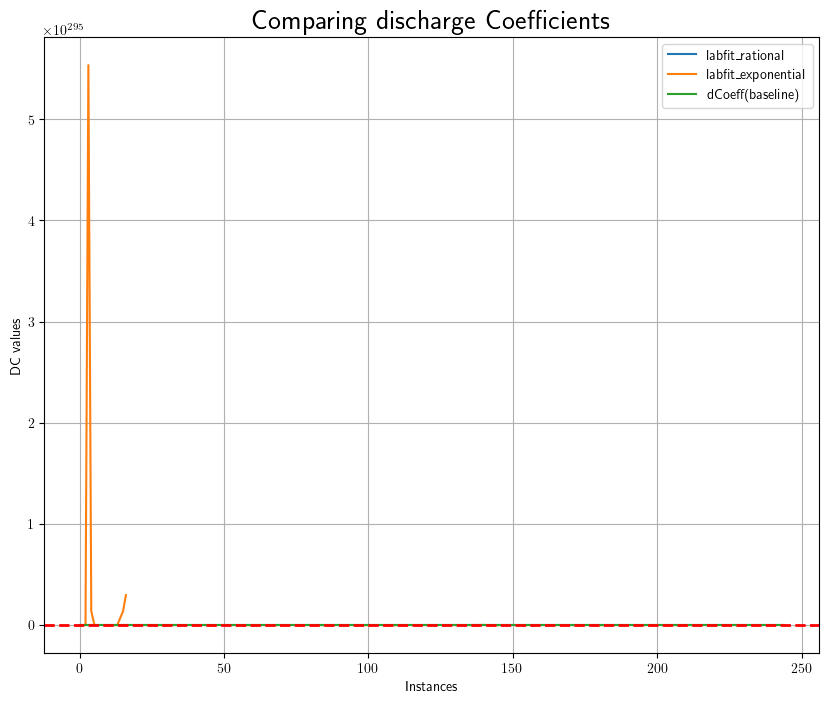

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(data0['labfit_dcoef0'], label='labfit_rational')
plt.plot(data0['labfit_dcoef1'], label='labfit_exponential')
plt.plot(data0['dcoef0'], label='dCoeff(baseline)')
plt.axhline(y=1, linestyle='--', color='red', linewidth=2.0)
plt.title('Comparing discharge Coefficients', fontsize=20)
plt.xlabel('Instances', fontsize=10)
plt.ylabel('DC values', fontsize=10)
plt.grid(True)
plt.legend()
#plt.plot(data['labfit0']/data['Static_Pa'])

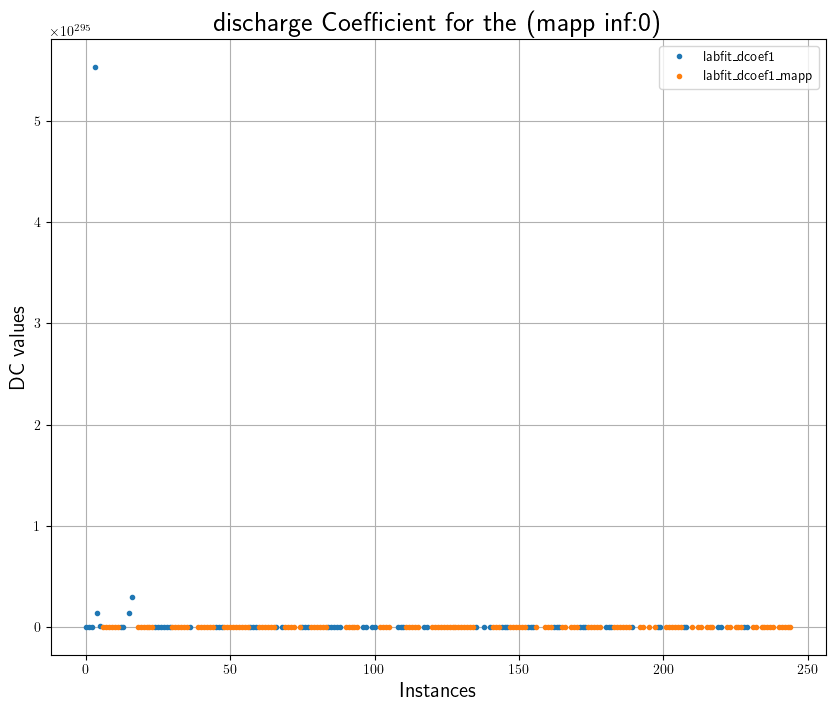

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(data0['labfit_dcoef1'], '.', label='labfit_dcoef1')
plt.plot(data0['labfit_dcoef1_mapp'], '.', label='labfit_dcoef1_mapp')
#plt.axhline(y=1, linestyle='--', color='red', linewidth=2.0)
plt.title('discharge Coefficient for the (mapp inf:0)', fontsize=20)
plt.xlabel('Instances', fontsize=15)
plt.ylabel('DC values', fontsize=15)
plt.grid(True)
plt.legend()


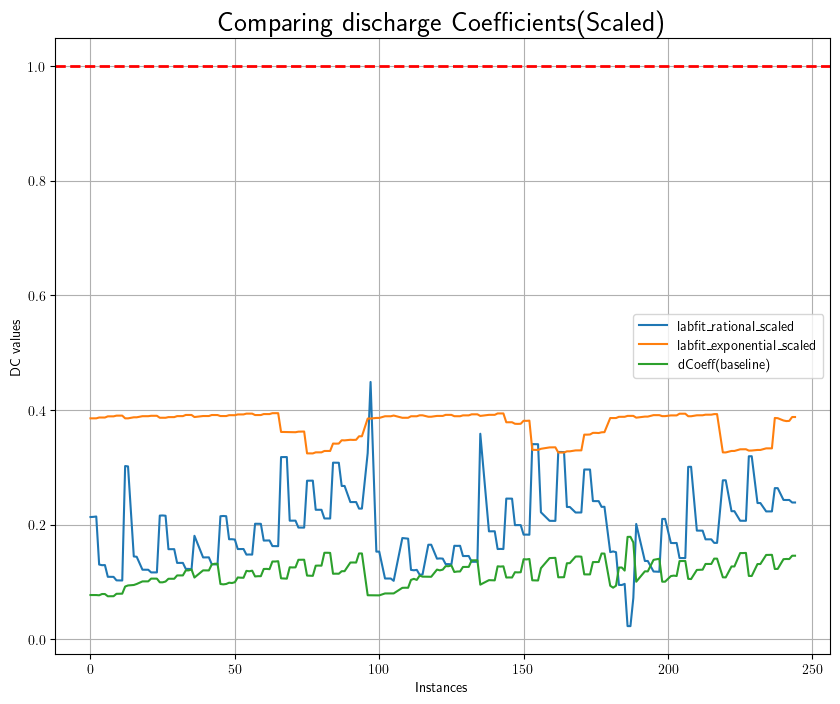

In [ ]:
data0['dc_lfs0'] = data0.apply(labfit0_scaled, axis=1)
data0['dc_lfs1'] = data0.apply(labfit1_scaled, axis=1)



plt.figure(figsize=(10, 8))
plt.plot(data0['dc_lfs0'], label='labfit_rational_scaled')
plt.plot(data0['dc_lfs1'], label='labfit_exponential_scaled')
plt.plot(data0['dcoef0'], label='dCoeff(baseline)')
plt.axhline(y=1, linestyle='--', color='red', linewidth=2.0)
plt.title('Comparing discharge Coefficients(Scaled)', fontsize=20)
plt.xlabel('Instances', fontsize=10)
plt.ylabel('DC values', fontsize=10)
plt.grid(True)
plt.legend()


# scaled versions of the fits are much stable, could use the exponential for example
# the exponential is the best of them, the labfit is pretty impressive, there  its still some 
# deviations from ideal but the best so far, 30 
# what are the benefits to the business to choose the exponential model, with some scaling if that's possible?
# or an adjusted exponential, where we add a constant term to prevent in stability? 
# 

In [ ]:
np.isnan(data0['labfit_dcoef1_mapp']
).count()

210

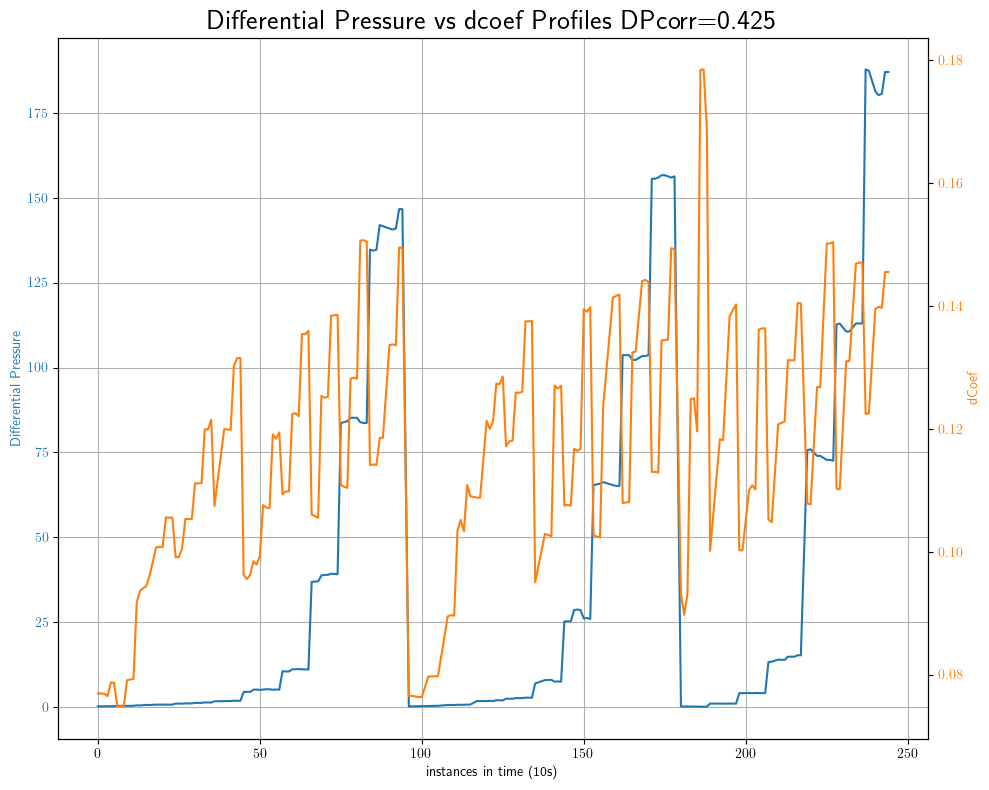

In [ ]:
# I want to see the dcoef against the pressure/statics and differential 

#plt.plot(data0['Static_Pa'], label='Static Pressure')
#plt.plot(data0['dcoef0'], label='dCoef (baseline)')


fig, ax1 = plt.subplots(figsize=(10, 8))

color = 'tab:blue'
ax1.set_xlabel('instances in time (10s)', fontsize=10)
ax1.set_ylabel('Differential Pressure', color=color, fontsize=10)
ax1.plot(data0['Differential_Pa'], label='Differential Pressure', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('dCoef', color=color, fontsize=10)  # we already handled the x-label with ax1
ax2.plot(data0['dcoef0'], label='dCoef (baseline)', color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title(f'Differential Pressure vs dcoef Profiles {DPcorr=:.3f}', fontsize=20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [ ]:
# give meaning to time axis to see 
# mark peaks 
# normalise static presssure (z-score)
# consider z-scoring the variables
# rescale the variables to lie between (0, 1) -- rescaled the variables... 
# 

In [ ]:
SPcorr = np.corrcoef(data0['SP_scale'], data0['dcoef0'])[0,1]
DPcorr = np.corrcoef(data0['DP_scale'], data0['dcoef0'])[0, 1]

In [ ]:
SPcorr

0.5889850361087231

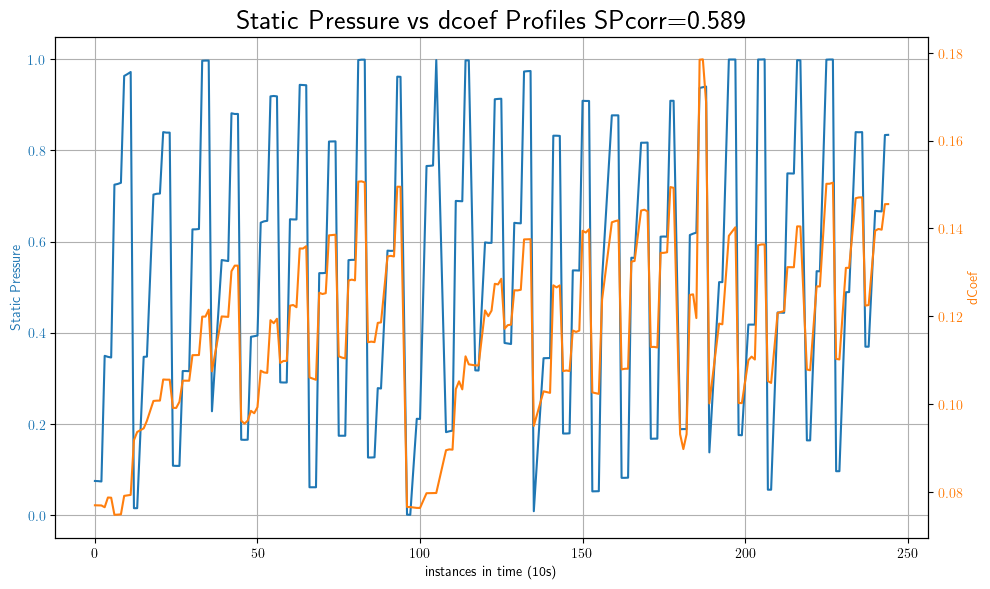

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('instances in time (10s)', fontsize=10)
ax1.set_ylabel('Static Pressure', color=color, fontsize=10)
ax1.plot(data0['SP_scale'], label='Static Pressure', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('dCoef', color=color, fontsize=10)  # we already handled the x-label with ax1
ax2.plot(data0['dcoef0'], label='dCoef (baseline)', color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title(f"Static Pressure vs dcoef Profiles {SPcorr=:.3f}", fontsize=20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


# building a model... 

In [ ]:
# where is the static pressure reading from?
# the baseline dCoeff closely follows the static pressure...
# its more sensitive to the static pressure than differential pressure 
# the flow meters are more sensitive to static pressure than to differential pressure
# is this surprising? (we do some conversions of the readings from the meter before the computations)
# in the excel is says new cd (static pressure)
# why does static pressure fluctuate a lot? 
# it is unlikely its manually controlled ( given the resolution of the fluctuations)? 
# why use the static pressure and differential pressure (these are the raw values from the meter)


In [ ]:
# structuring a model 
# static pressure, differential pressure, decof0
# surrogate data 
x0=np.random.rand(100,).reshape(-1, 1)
x1=np.random.rand(100,).reshape(-1, 1)
y = x0 + x1 
X=np.hstack((x0, x1))

In [ ]:
linreg_surrogate = LinearRegression().fit(X, y)

In [ ]:
R_sq=linreg_surrogate.score(X, y)

In [ ]:
linreg_surrogate.coef_

array([[1., 1.]])

In [ ]:
y_pred=linreg_surrogate.predict(X)

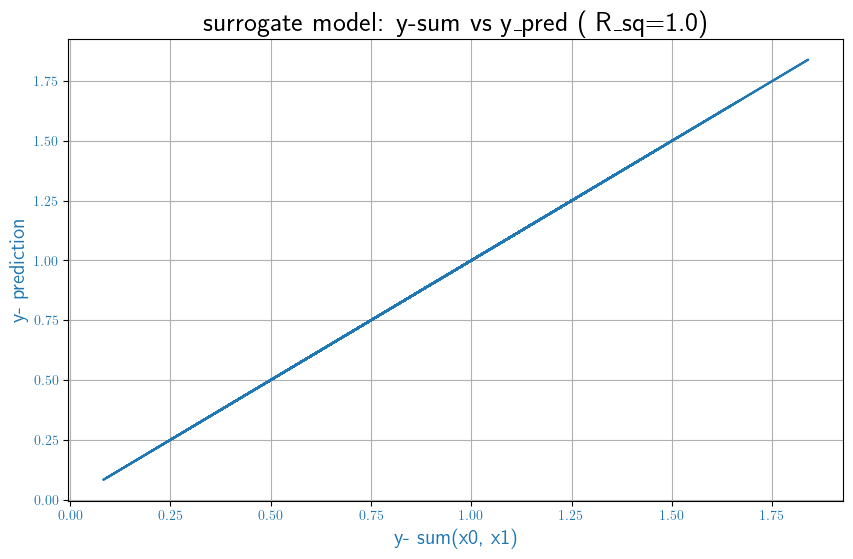

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('y- sum(x0, x1)', color=color, fontsize=15)
ax1.set_ylabel('y- prediction', color=color, fontsize=15)
ax1.plot(y, y_pred, color=color)
ax1.set_title(f"surrogate model: y-sum vs y_pred ({ R_sq=})", fontsize=20)
ax1.tick_params(axis='both', labelcolor=color)
ax1.grid()

In [ ]:
# using actual variables SP_scale, DP_scale
X0 = np.hstack((data0['SP_scale'].values.reshape(-1, 1), data0['DP_scale'].values.reshape(-1, 1)))
y0 = data0['dcoef0'].values.reshape(-1, 1)
X00 = np.hstack((data0['Static_Pa'].values.reshape(-1, 1), data0['Differential_Pa'].values.reshape(-1, 1)))


In [ ]:
linreg_baseline = LinearRegression().fit(X0, y0)

In [ ]:
linreg_baseline.coef_

array([[0.04019416, 0.03217428]])

In [ ]:
R0_sq=linreg_baseline.score(X0, y0)

In [ ]:
y0_pred = linreg_baseline.predict(X0)


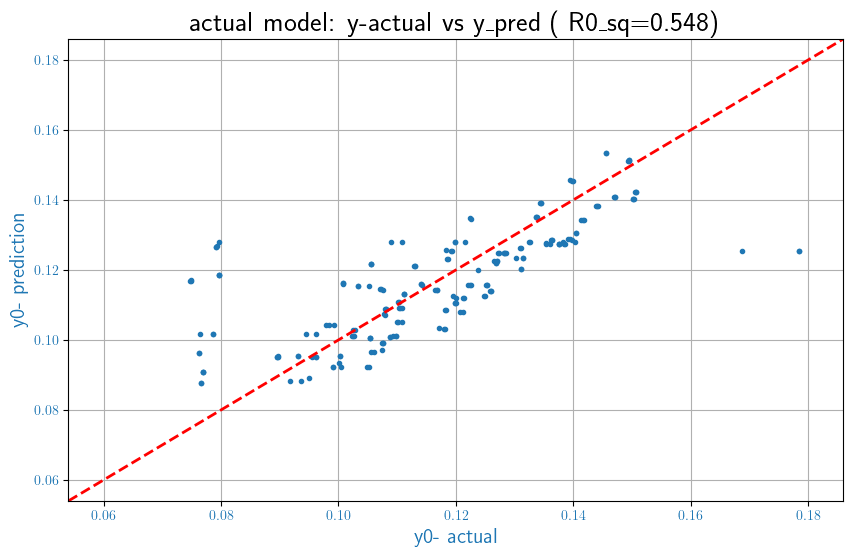

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('y0- actual', color=color, fontsize=15)
ax1.set_ylabel('y0- prediction', color=color, fontsize=15)
ax1.plot(y0, y0_pred, '.', color=color)
ax1.axline((0.06, 0.06), (0.18, 0.18), linestyle='--', color='red', linewidth=2.0)
ax1.set_title(f"actual model: y-actual vs y_pred ({ R0_sq=:.3f})", fontsize=20)
ax1.tick_params(axis='both', labelcolor=color)
ax1.grid()

In [ ]:
# try polyfit model for the data
# attempt a bayesian model fitting for the data


# 2D polyfit 

In [ ]:
X_design = np.vstack((np.ones_like(data0['SP_scale']), data0['SP_scale'], data0['DP_scale'], data0['SP_scale']**2, data0['SP_scale']*data0['DP_scale'], data0['DP_scale']**2)).T

In [ ]:
coef, r, rank, s= np.linalg.lstsq(X_design, y0)

/var/folders/f4/q6n418p95nb77wmf4l9zydddrkwtmh/T/ipykernel_16686/1270856328.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, r, rank, s= np.linalg.lstsq(X_design, y0)


In [ ]:
y0_pred_ply = X_design @ coef

In [ ]:
residual_ply = y0.reshape(-1, ) - y0_pred_ply.reshape(-1,) 
mse_ply = np.mean(residual_ply**2)
# what's the score of the polyfit model?
# the object doesn't have a score call...

In [ ]:
mse_ply

0.00017990823802168797

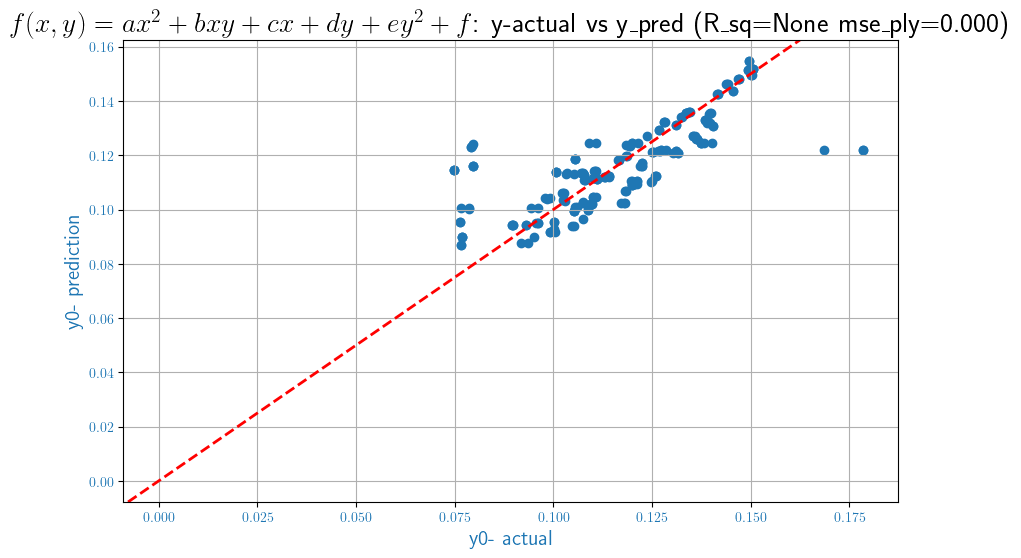

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('y0- actual', color=color, fontsize=15)
ax1.set_ylabel('y0- prediction', color=color, fontsize=15)
ax1.scatter(y0, y0_pred_ply, color=color)
ax1.axline((0.0, 0.0), slope=1, linestyle='--', color='red', linewidth=2.0)
ax1.set_title(f"$f(x, y) = a x^2 + b xy + cx+ dy+ ey^2 + f$: y-actual vs y_pred (R_sq={None} {mse_ply=:.3f})", fontsize=20)
ax1.tick_params(axis='both', labelcolor=color)
ax1.grid()

Text(0, 0.5, 'Residuals')

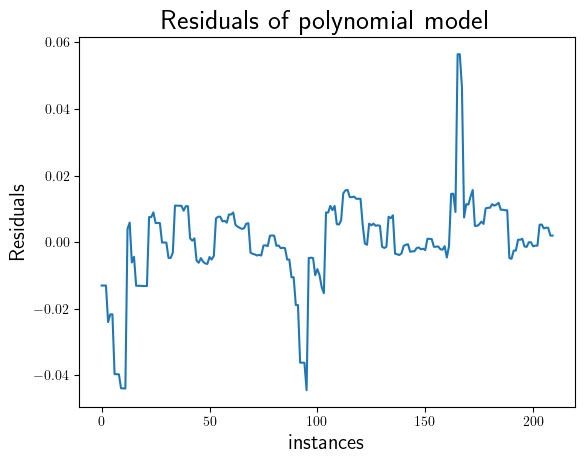

In [ ]:
plt.plot(residual_ply)
plt.title("Residuals of polynomial model", fontsize=20)
plt.xlabel("instances", fontsize=15)
plt.ylabel("Residuals", fontsize=15)

In [ ]:
# need to visualize

In [ ]:
glinreg_gaussian = sm.GLM(y0, X0, family=sm.families.Gaussian(link=sm.families.links.Log()))

In [ ]:
glinreg_gaussian.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  210
Model:                            GLM   Df Residuals:                      208
Model Family:                Gaussian   Df Model:                            1
Link Function:                    Log   Scale:                      1.1280e+15
Method:                          IRLS   Log-Likelihood:                -3936.2
Date:                Fri, 14 Feb 2025   Deviance:                   2.3461e+17
Time:                        09:47:58   Pearson chi2:                 2.35e+17
No. Iterations:                   100   Pseudo R-squ. (CS):             -1.693
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            20.0538      0.040    495.684      0.000      19.975      20.133
x2          -434.7990     21.025    -20.680      0.000    -476.007    -393.591
==============================================================================
"""

In [ ]:
glinreg_gaussian.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  210
Model:                            GLM   Df Residuals:                      208
Model Family:                Gaussian   Df Model:                            1
Link Function:                    Log   Scale:                      1.1280e+15
Method:                          IRLS   Log-Likelihood:                -3936.2
Date:                Fri, 14 Feb 2025   Deviance:                   2.3461e+17
Time:                        09:47:58   Pearson chi2:                 2.35e+17
No. Iterations:                   100   Pseudo R-squ. (CS):             -1.693
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            20.0538      0.040    495.684      0.000      19.975      20.133
x2          -434.7990     21.025    -20.680      0.000    -476.007    -393.591
==============================================================================
"""

In [ ]:
glinreg_gamma = sm.GLM(y0, X0, family=sm.families.Gamma())

/Users/duuta/anaconda3/envs/torchpp/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


In [ ]:
glinreg_gamma.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  210
Model:                            GLM   Df Residuals:                      208
Model Family:                   Gamma   Df Model:                            1
Link Function:           InversePower   Scale:                         0.40905
Method:                          IRLS   Log-Likelihood:                 168.16
Date:                Fri, 14 Feb 2025   Deviance:                       147.44
Time:                        09:47:58   Pearson chi2:                     85.1
No. Iterations:                     8   Pseudo R-squ. (CS):             -4.123
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            11.9544      0.656     18.216      0.000      10.668      13.241
x2             6.6952      1.036      6.462      0.000       4.664       8.726
==============================================================================
"""

# decisionTree Regressor

In [ ]:
regressorD = DecisionTreeRegressor(random_state=0)
regressorD.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [ ]:
R_sq_surro_dt = regressorD.score(X,y.reshape(-1, ))
y_pred_surro_dt = regressorD.predict(X)

In [ ]:
residuals_surro = y.reshape(-1, ) - y_pred_surro_dt
mse_surro = np.mean((y.reshape(-1,) - y_pred_surro_dt)**2)

Text(0, 0.5, 'Residuals')

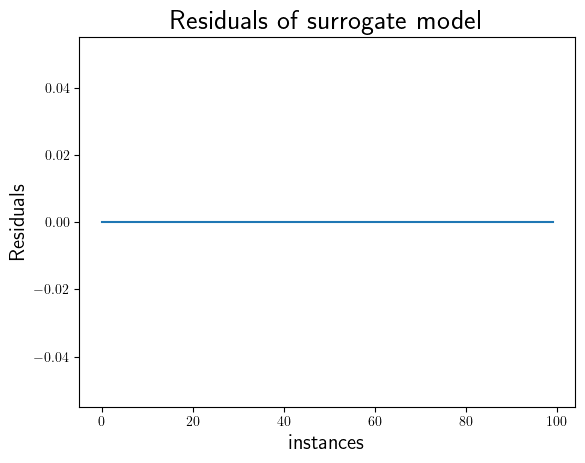

In [ ]:
plt.plot(residuals_surro)
plt.title("Residuals of surrogate model", fontsize=20)
plt.xlabel("instances", fontsize=15)
plt.ylabel("Residuals", fontsize=15)

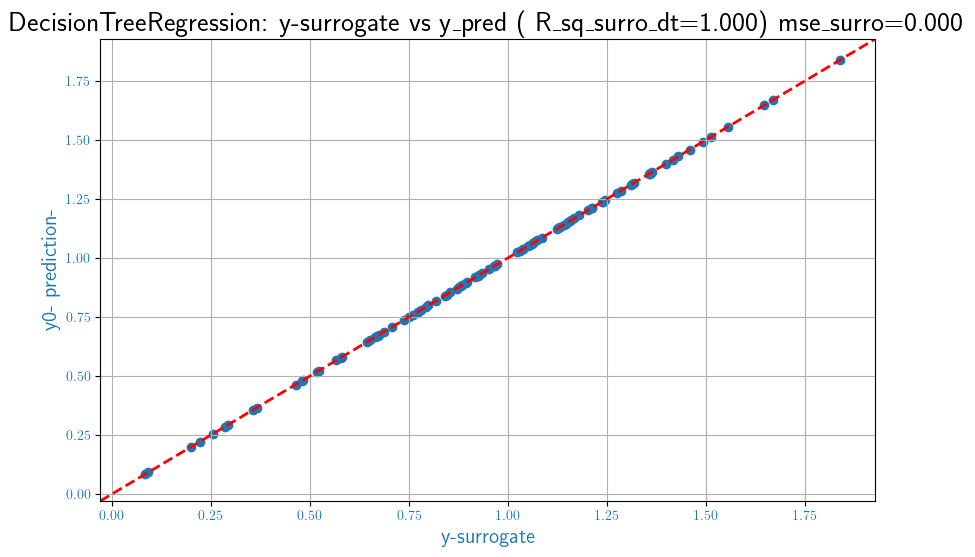

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('y-surrogate', color=color, fontsize=15)
ax1.set_ylabel('y0- prediction-', color=color, fontsize=15)
ax1.scatter(y, y_pred_surro_dt, color=color)
ax1.axline((0.06, 0.06), (0.18, 0.18), linestyle='--', color='red', linewidth=2.0)
ax1.set_title(f"DecisionTreeRegression: y-surrogate vs y_pred ({ R_sq_surro_dt=:.3f}) {mse_surro=:.3f}", fontsize=20)
ax1.tick_params(axis='both', labelcolor=color)
ax1.grid()

y0.shape

In [ ]:
y0.shape

(210, 1)

In [ ]:
regressorD.fit(X0, y0)
R0_sq_dt = regressorD.score(X0, y0.reshape(-1, ))
y0_pred_dt = regressorD.predict(X0)

In [ ]:
 residuals = y0.reshape(-1, ) - y0_pred_dt
 mse0 = np.mean(residuals**2)

In [ ]:
def residual_plots(residuals, xlabel="instances", ylabel="Residuals", xfontsize=15, title="Residuals of actual model", Tfontsize=20, **kwargs):
    plt.plot(residuals, **kwargs)
    plt.title(title, fontsize=Tfontsize)
    plt.xlabel(xlabel, fontsize=xfontsize)
    plt.ylabel(ylabel, fontsize=yfontsize)

    return None

Text(0, 0.5, 'Residuals')

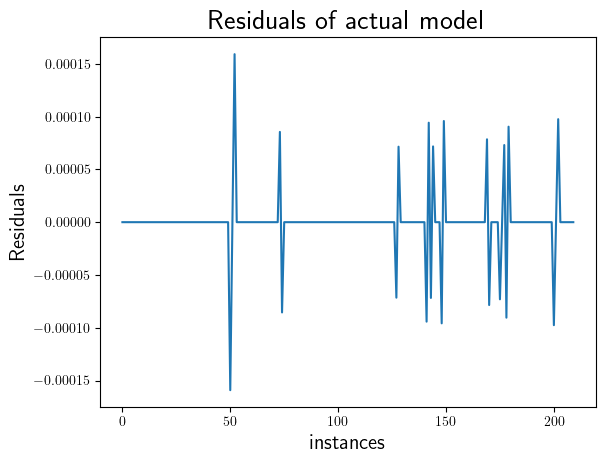

In [ ]:
plt.plot(residuals)
plt.title("Residuals of actual model", fontsize=20)
plt.xlabel("instances", fontsize=15)
plt.ylabel("Residuals", fontsize=15)

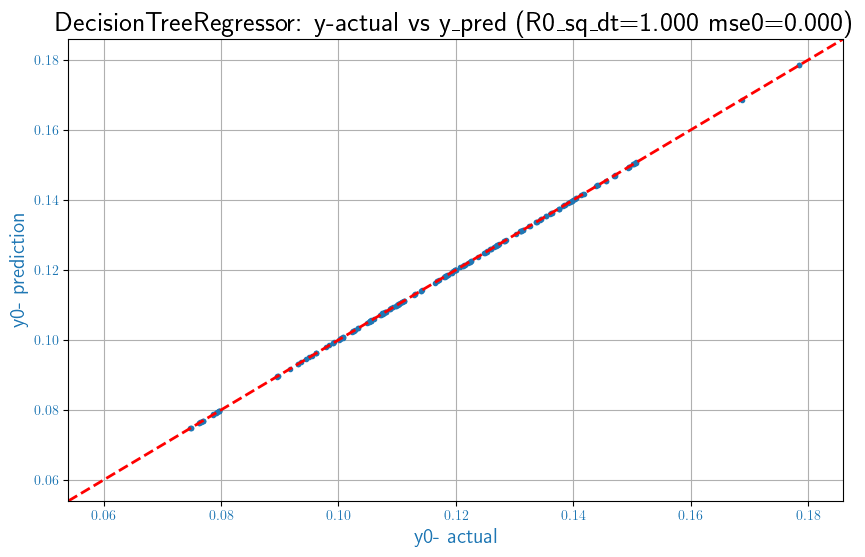

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('y0- actual', color=color, fontsize=15)
ax1.set_ylabel('y0- prediction', color=color, fontsize=15)
ax1.plot(y0, y0_pred_dt, '.', color=color)
ax1.axline((0.06, 0.06), (0.18, 0.18), linestyle='--', color='red', linewidth=2.0)
ax1.set_title(f"DecisionTreeRegressor: y-actual vs y_pred ({R0_sq_dt=:.3f} {mse0=:.3f})", fontsize=20)
ax1.tick_params(axis='both', labelcolor=color)
ax1.grid()

In [ ]:
# decision tree models seems to be really good, the mean square error (0.001) and the Score (0.99)) 
# compare the mean score errors of the lalbfit models vs the Decisions tree models
# make plot of the decision tree models

In [ ]:
y0_labfit0 = data0['labfit_dcoef0'].values.reshape(-1, )
y0_labfit1 = data0['labfit_dcoef1'].values.reshape(-1, )

In [ ]:
residuals00 = y0.reshape(-1, ) - y0_labfit0
residuals01= y0.reshape(-1,) - y0_labfit1 

mse00 = np.mean(residuals00**2)
mse01 = np.mean(residuals01**2)

/var/folders/f4/q6n418p95nb77wmf4l9zydddrkwtmh/T/ipykernel_16686/2748934094.py:5: RuntimeWarning: overflow encountered in square
  mse01 = np.mean(residuals01**2)


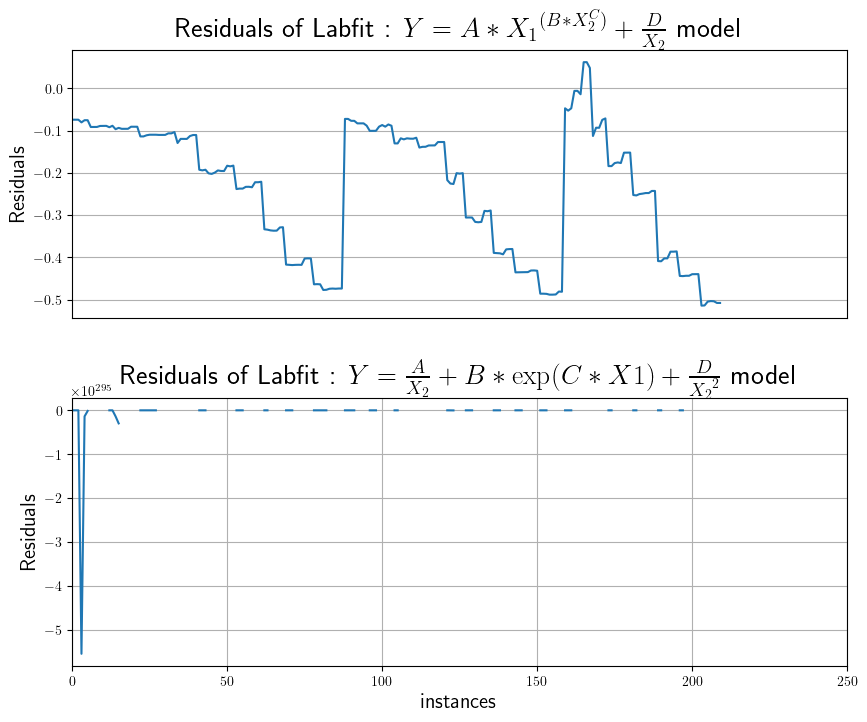

In [ ]:
fig, ax00 = plt.subplots(2, 1, figsize=(10, 8))
ax00[0].plot(residuals00)
ax00[0].set_title(r"Residuals of Labfit : $Y=A*{X_{1}}^{(B*X_{2}^C)}+ \frac{D}{X_{2}}$  model", fontsize=20)
ax00[0].set_ylabel("Residuals", fontsize=15)
ax00[0].set_xlim([0, 250])
ax00[0].set_xticks([])
ax00[0].grid()
# adjust vertical space
plt.subplots_adjust(hspace=0.3)

ax00[1].plot(residuals01)
ax00[1].set_title(r"Residuals of Labfit : $Y=\frac{A}{X_{2}}+B*\exp(C*X1)+\frac{D}{{X_{2}}^2}$  model", fontsize=20)
ax00[1].set_xlabel("instances", fontsize=15)
ax00[1].set_ylabel("Residuals", fontsize=15)
ax00[1].set_xlim([0, 250])
ax00[1].grid()

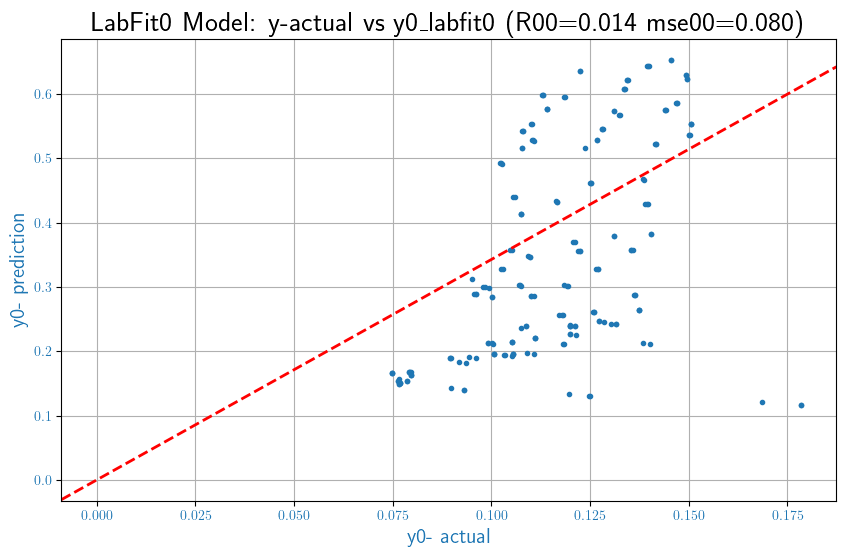

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('y0- actual', color=color, fontsize=15)
ax1.set_ylabel('y0- prediction', color=color, fontsize=15)
ax1.plot(y0, y0_labfit0, '.', color=color)
ax1.axline((0, 0), (0.175, 0.6), linestyle='--', color='red', linewidth=2.0)
ax1.set_title(f"LabFit0 Model: y-actual vs y0_labfit0 ({R00=:.3f} {mse00=:.3f})", fontsize=20)
ax1.tick_params(axis='both', labelcolor=color)
ax1.grid()

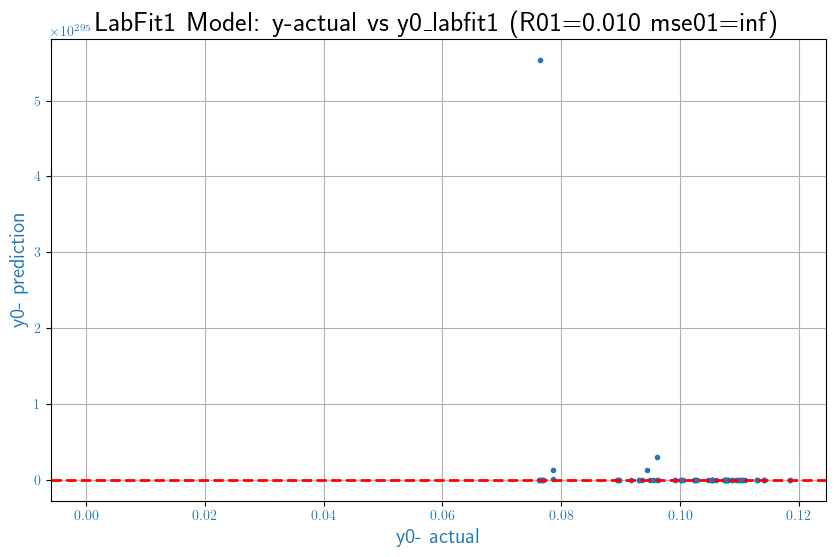

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('y0- actual', color=color, fontsize=15)
ax1.set_ylabel('y0- prediction', color=color, fontsize=15)
ax1.plot(y0, y0_labfit1, '.', color=color)
ax1.axline((0., 0.), slope=1, linestyle='--', color='red', linewidth=2.0)
ax1.set_title(f"LabFit1 Model: y-actual vs y0_labfit1 ({R01=:.3f} {mse01=:.3f})", fontsize=20)
ax1.tick_params(axis='both', labelcolor=color)
ax1.grid()

 # Curve_fit : attempting to recreate labfit model parameters 

In [ ]:
# x0 = static_Pa , x1 = Differential Pa
#labfit0_func = lambda x0, x1, *p: p[0]*x1**(p[1]*x0**(p[2])) + p[3]/x0 
def labfit_func(X, p0, p1, p2, p3):
    x0, x1 = X[:, 0], X[:, 1]
    return p0*x1**(p1*x0**p2) + p3/x0 
    
def lm_model(X, p0, p1):
    x0, x1 = X[:,0], X[:, 1]
    return p0*x0 + p1*x1 
#initial_guess= [1, 1, 1, 1]

In [ ]:
popt, pcov0=curve_fit(
    lm_model, 
    xdata=X, 
    ydata=y.flatten(),
    method='lm',
)

In [ ]:
np.linalg.cond(pcov0)

inf

In [ ]:
curve_fit(
    labfit_func, 
    xdata=X0, 
    ydata=y0.flatten(),
)

/var/folders/f4/q6n418p95nb77wmf4l9zydddrkwtmh/T/ipykernel_16686/3136598539.py:5: RuntimeWarning: divide by zero encountered in divide
  return p0*x1**(p1*x0**p2) + p3/x0
/Users/duuta/anaconda3/envs/torchpp/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


(array([1., 1., 1., 1.]),
 array([[inf, inf, inf, inf],
        [inf, inf, inf, inf],
        [inf, inf, inf, inf],
        [inf, inf, inf, inf]]))

# make a plot for condition number of a matrix as function for perfectly fit regression model 

In [ ]:

def make_plot(x_samples, y_condition):
    fig00, ax1 = plt.subplots(figure(10, 6))
    ax1.plot(x_samples, y_condition, 'r--', )
    ax1.set_title("Condition number vs Sample size", fontsize=20)
    ax1.set_xlabel("Sample Size")
    ax1.set_ylabel("Condition number")


def compute_condition_num(pcov):
    return np.linalg.cond(pcov)

def generate_data_samples(start, stop, size):
    return np.linspace(start, stop, size)
    
def get_pcov(func, xdata, y, **kwargs):
    _, pcov = curve_fit(func, xdata, y, **kwargs)
    return pcov

In [ ]:
def datagen_wrapper(func, y0, start0, stop0, size0, start, stop, size,  pcov):
    y = np.empty(size0) # init condition 
    X = np.empty(size0)
    for i, num in enumerate(range(start, stop, size)):
        X[i] = num 
        xdata = generate_data_samples(start0, stop0, num)
        pcov = get_pcov(func, xdata, y0)
        y[i] = compute_condition_num(pcov)
    return X, y

        

# trying via meshgrid to check the labfit...


In [ ]:
x_sp =data0['SP_scale'].values.reshape(-1, 1) 
x_dp =data0['DP_scale'].values.reshape(-1, 1)


SPv, DPv = np.meshgrid(data0['SP_scale'], data0['DP_scale'])
DCv, *_ = np.meshgrid(data0['dcoef0'])


X_sp, X_dp = np.meshgrid(x_sp, x_dp)
x_data = np.vstack([X_sp.ravel(), X_dp.ravel()])

# compute the meshgrid for the data 
# use that to compute the fuction 
# find parameters for the model 
# how to choose parameters to initialize the model... 
# then verify if curve_fit to generate the model the...

# Gaussian Process regression 

$a + b = c $



# differential optimization

In [ ]:
# optimize the labfit_func see if you get the parameters from  labfit tool 
# attempt today...
#  

In [ ]:
# plot x0, x1, dcoef (3D)
# compare baseline regression with baseline of... 
# see if curve fit will generate the parameter values of labfit...
# results with curve_fit is not very stable
# the pcov is ill-conditioned, 
# attempt setting a region for the optimization
# if the fit is perfect the pcov matrix is ill-condition, appears ill conditioned...,
# is not as a result of collinearity issues, 
# followed for the results...
# how to cast R-sq in terms of reduced chi-squared. 

In [ ]:
# the structure in CD variable in the data is inherited from the models computation
# or is inherited from some other source?
# DC appears to be some regularization of the model values
# the model values are negative
# why do we have values of 12 in the data? I thought the max was 1 in DC data?
# what are the reasonable values of Discharge coefficient (min, max)

In [ ]:
# convert dc to flow 
# plot flow
# integrate flow for various flows
# and compare the performance the in terms of the consumptions
# 
# flow formulae
# discharge_coefficient * A2 * sqrt(2* Differential_Pa )/ (ro*(1 - (A2/A1)^2))

data0['flow0'] = data0.apply(lambda row: flow_amounts(row.dcoef, row.DP_scale), axis=1)
data0['flow_labfit0'] = data0.apply(lambda row: flow_amounts(row.dc_lfs0, row.DP_scale), axis=1)
data0['flow_labfit1'] = data0.apply(lambda row: flow_amounts(row.dc_lfs1, row.DP_scale), axis=1)
data0['flow_dTree'] = data0.apply(lambda row: flow_amounts(y0_pred_dt, row.DP_scale), axis=1)
data0['flow_poly2D'] = data0.apply(lambda row: flow_amounts(y0_pred_ply.reshape(-1,), row.DP_scale), axis=1)

ValueError: setting an array element with a sequence.

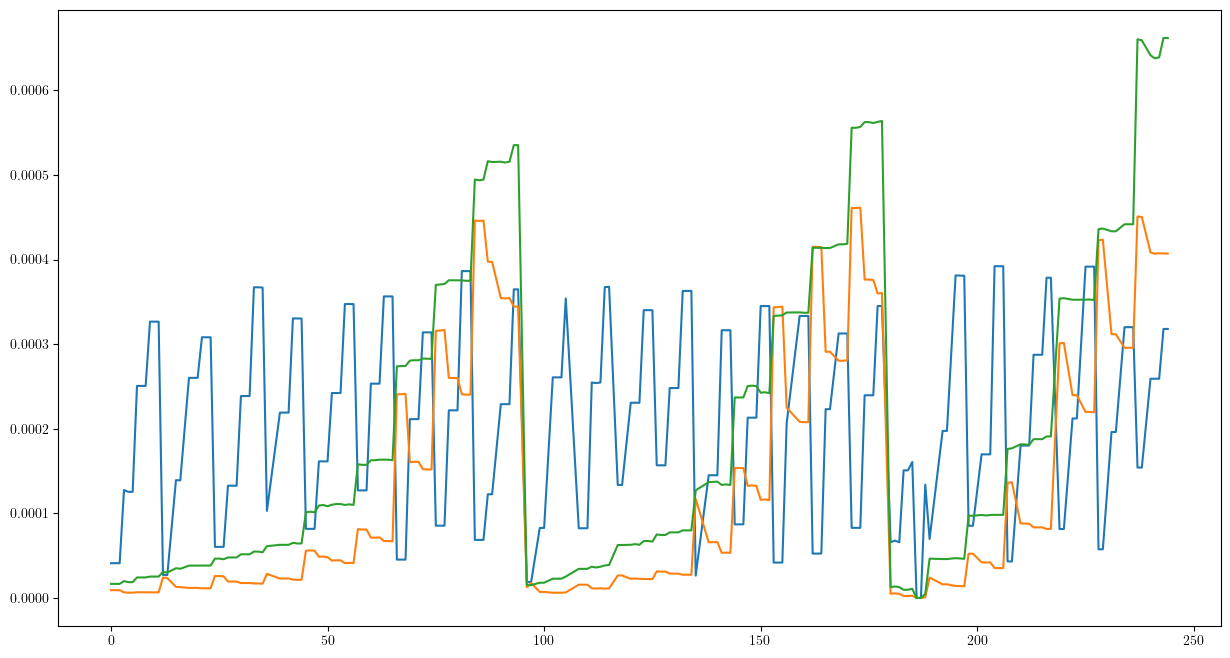

In [ ]:
plt.subplots(figsize=(15, 8))
plt.plot(data0.flow0, label='')
plt.plot(data0.flow_labfit0, label='LabFit-Rational') 
plt.plot(data0.flow_labfit1, label='LabFit-Exponential')
plt.plot(data0.flow_dTree, label='Decision Tree Model')
plt.plot(data0.flow_poly2D, label='2 order Polynomial')

In [ ]:
data0.flow_poly2D

0      [[3.893095481338215e-06], [3.8924746054210055e...
1      [[3.893095481338215e-06], [3.8924746054210055e...
2      [[3.893095481338215e-06], [3.8924746054210055e...
3      [[4.633710457576741e-06], [4.632971467422448e-...
4      [[4.352613069584757e-06], [4.351918909206521e-...
                             ...                        
240    [[0.0001513266127978931], [0.00015130247903339...
241    [[0.00015085431027605503], [0.0001508302518349...
242    [[0.00015101330252072453], [0.0001509892187233...
243    [[0.00015368689885984828], [0.0001536623886738...
244    [[0.00015368689885984828], [0.0001536623886738...
Name: flow_poly2D, Length: 210, dtype: object

In [ ]:
flow_amounts(y0_pred_ply.reshape(-1,), data0.DP_scale)

0      0.000004
1      0.000004
2      0.000004
3      0.000005
4      0.000005
         ...   
240    0.000228
241    0.000227
242    0.000227
243    0.000245
244    0.000245
Name: DP_scale, Length: 210, dtype: float64

In [ ]:
data0.flow_poly2D

0      [3.893095481338215e-06, 3.8924746054210055e-06...
1      [3.893095481338215e-06, 3.8924746054210055e-06...
2      [3.893095481338215e-06, 3.8924746054210055e-06...
3      [4.633710457576741e-06, 4.632971467422448e-06,...
4      [4.352613069584757e-06, 4.351918909206521e-06,...
                             ...                        
240    [0.0001513266127978931, 0.00015130247903339398...
241    [0.00015085431027605503, 0.0001508302518349747...
242    [0.00015101330252072453, 0.0001509892187233548...
243    [0.00015368689885984828, 0.0001536623886738664...
244    [0.00015368689885984828, 0.0001536623886738664...
Name: flow_poly2D, Length: 210, dtype: object

In [26]:
xi = pd.read_csv("/Users/duuta/inclusiveEnergy-/240902raw_mac.csv")

In [35]:
xi.rename(columns={"LPM Rota":"LPM_Rota"}, inplace=True)


In [36]:
xi.columns

Index(['Static Pressure', 'LPM_Rota', 'temp_mcu', 'Static_Pa', 'SP_mV',
       'DP_mV', 'Differential_Pa', 'Flow_lph'],
      dtype='object')

In [50]:
xi['LPM_rota_norm'] = xi.apply(LPM_rota_normalization, axis=1)
xi['SB_lpm'] = xi.apply(SB_lpm, axis=1)

In [51]:
xi['dcoeff_normalised'] = xi['LPM_rota_norm']/xi['SB_lpm']

In [52]:
xi.LPM_rota_norm

0       23.279680
1       23.296991
2       23.296991
3       26.165248
4       26.197509
          ...    
229    366.866416
230    366.866416
231    430.279001
232    430.279001
233    429.794439
Name: LPM_rota_norm, Length: 234, dtype: float64

In [167]:
val = np.random.randn(100, )*100

In [172]:
scaled= (val - min(val))/(max(val) - min(val))


In [173]:
max(scaled)

1.0

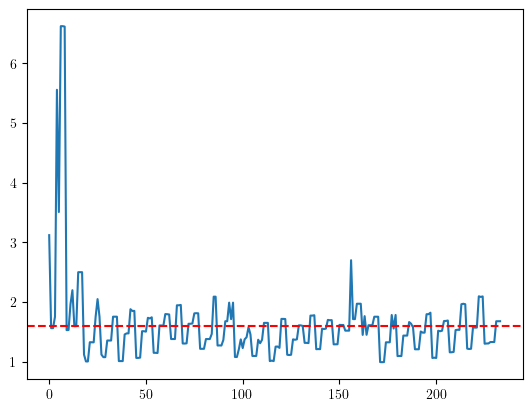

In [59]:
plt.plot(xi.dcoeff_normalised)
plt.axhline(y=np.mean(xi.dcoeff_normalised), linestyle='--', color='r')


In [ ]:
# class to get data, transform and export labfit data

import csv 
import pandas as pd

# look class with CSV module python
# use pandas for duplications
# might have to use pandas for the implementations

# (data0.Differential_Pa - min(data0.Differential_Pa))/ (max(data0.Differential_Pa) - min(data0.Differential_Pa)) 

@pd.api.extensions.register_dataframe_accessor("inclusiveEnergy")
class inclusiveEnergyDataObject(object):
    def __init__(self, filename, delimiter, **kwargs):
        self.filename = filename
        self.delimiter = delimiter 
        self.data = pd.read_csv(self.filename, delimiter=self.delimiter, **kwargs)

    @staticmethod
    scaling = lambda x: (x - min(x)) / (max(x) - min(x))
        

    def __get__(self, var):
        if var not in self.columns:
            raise KeyError f"{var} not in data columns..."
        return self.var # pandas language     
    
    
    def read(self):
        "Using csv module..."
        with open(self.filename, 'r') as csvFile:
            Reader = csv.reader(csvFile, delimiter=self.delimiter)
            data = []
            for row in data:
                print(f">>> {row}")
                data.append(row)
       return data 


    def read_filename(self):
        return pd.read_csv(self.filename)
        
    
    def remove_duplicates(self, inplace=bool):
        """
        return data without duplicates 
        """
        if inplace:
            self= self.drop_duplicates()
        return self.drop_duplicates
        
    def transform_desired_variables(self):
        """

        """
        return data_transformed_variables
    
    def export_labfit_data(self, (var1, var2, var3), file_name, format='csv'):
        '''get transformed data and'''a
        var1, var2, var3 =(var1, var2, var3)
        with open("file_name", "w+") as writer:
            writer = writer.rows(writer)
            for row in self.read():
                writer.write(row)
        return labfit_data 



def __compare__(y_actual, y_predicted, modelScore, figsize=(12, 8)):
        """
            takes y_actual and y_predicted, and outputs a set of plots and metrics
            including mse error, score of the model 
        """
        residuals = y_actual - y_predicted
        mse = np.mean(residuals**2)
        fig, ax0 = plt.suplots(figsize=figsize)
        pass 

    def compare(compare_dict):
        #for key in compare_dict.keys():
        pass 

    